In [1]:


import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Carregando os dados

dados_doenca=pd.read_table('dados_doenca.txt')
dados_doenca.head()

,ano,doenca,tm,ur
0,1987,1,30.14,82.86
1,1988,0,30.66,79.57
2,1989,0,26.10,89.14
3,1990,1,28.43,91.00
4,1991,0,29.57,80.57


In [2]:
# Modelo de probabilidade linear

x=dados_doenca[['tm','ur']]
y=dados_doenca['doenca']

x=sm.add_constant(x)

reg_linear=sm.OLS(y,x).fit()

print('\nResumo do modelo de probabilidade linear')
print(reg_linear.summary())


Resumo do modelo de probabilidade linear
                            OLS Regression Results                            
Dep. Variable:                 doenca   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     2.829
Date:                Wed, 14 Jan 2026   Prob (F-statistic):              0.118
Time:                        18:47:53   Log-Likelihood:                -4.9963
No. Observations:                  11   AIC:                             15.99
Df Residuals:                       8   BIC:                             17.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [3]:
# Probabilidades estimadas do modelo linear

prob_linear=reg_linear.fittedvalues
print('\nProbabilidades estimadas (Modelo linear)')
print(prob_linear.head())



Probabilidades estimadas (Modelo linear)
0    0.803619
1    0.835925
2   -0.129236
3    0.602638
4    0.559683
dtype: float64


/tmp/ipython-input-1106126969.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(dados_doenca['ano'],prob_linear,'o-',linestyle='-',label='Probabilidade estimada (modelo linear)')


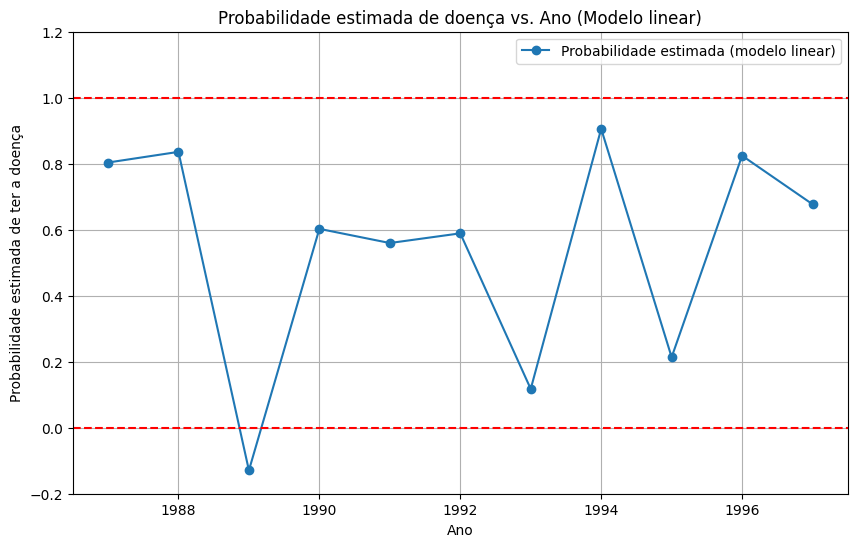

In [4]:
from matplotlib.lines import lineStyles
# Figura (anos em função das probabilidades)
plt.figure(figsize=(10,6))
plt.plot(dados_doenca['ano'],prob_linear,'o-',linestyle='-',label='Probabilidade estimada (modelo linear)')
plt.xlabel('Ano')
plt.ylabel('Probabilidade estimada de ter a doença')
plt.ylim(-0.2,1.2)
plt.axhline(0,color='red',linestyle='--')
plt.axhline(1,color='red',linestyle='--')
plt.legend()
plt.title('Probabilidade estimada de doença vs. Ano (Modelo linear)')
plt.grid(True)
plt.show()


In [5]:
# Acessando medidas de qualidade (para o modelo linear, essas classificaçãoes são menos significativas)
prob_linear_class=np.where(prob_linear>0.5,1,0)
print('\nClassificação (Modelo linear, limiar 0.5): ')
print(prob_linear_class)


Classificação (Modelo linear, limiar 0.5): 
[1 1 0 1 1 1 0 1 0 1 1]


In [6]:
# Tabela de confusão

tabela_linear=confusion_matrix(dados_doenca['doenca'],prob_linear_class)
print('\nTabela de confusão (Modelo linear)')
print(tabela_linear)


Tabela de confusão (Modelo linear)
[[3 2]
 [0 6]]


In [7]:
# Acurácia

AC_linear=np.trace(tabela_linear)/np.sum(tabela_linear)
print(f'\nAcurácia (Modelo linear):{AC_linear:.4f}')


Acurácia (Modelo linear):0.8182


In [8]:
# Taxa de erro aparente

TEA_linear=1-AC_linear
print(f'\nTaxa de erro aparente (Modelo linear):{TEA_linear:.4f}')


Taxa de erro aparente (Modelo linear):0.1818


In [9]:
# Sensibilidade (verdadeiros positivos)

S_linear=tabela_linear[1,1]/np.sum(tabela_linear[1,:])
print(f'\nSensibilidade (Modelo linear):{S_linear:.4f}')


Sensibilidade (Modelo linear):1.0000


In [11]:
# Especificidade (verdadeiros negativos)

E_linear=tabela_linear[0,0]/np.sum(tabela_linear[0,:])
print(f'\nEspecificidade (Modelo linear):{E_linear:.4f}')


Especificidade (Modelo linear):0.6000


In [12]:
# Modelo logit (não linearidade entre y e as variáveis explicativas)

x=dados_doenca[['tm','ur']]
x=sm.add_constant(x)
y=dados_doenca['doenca']

logit_model=sm.Logit(y,x).fit()
print('\nResumo do modelo logit')
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.432370
         Iterations 7

Resumo do modelo logit
                           Logit Regression Results                           
Dep. Variable:                 doenca   No. Observations:                   11
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.3725
Time:                        18:59:25   Log-Likelihood:                -4.7561
converged:                       True   LL-Null:                       -7.5791
Covariance Type:            nonrobust   LLR p-value:                   0.05943
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.2042     47.733     -1.596      0.110    -169.760      17.351
tm   

In [13]:
prob_logit_predict=logit_model.predict(x)
print('\nProbabilidades estimadas (Modelo logit)')
print(prob_logit_predict.head)


Probabilidades estimadas (Modelo logit)
<bound method NDFrame.head of 0     0.822991
1     0.863547
2     0.006191
3     0.484131
4     0.477090
5     0.608320
6     0.065014
7     0.907841
8     0.119671
9     0.906831
10    0.738373
dtype: float64>


/tmp/ipython-input-1586456851.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(dados_doenca['ano'],prob_logit_predict,'o-',linestyle='-',color='green',label='Probabilidade estimada (modelo logit)')


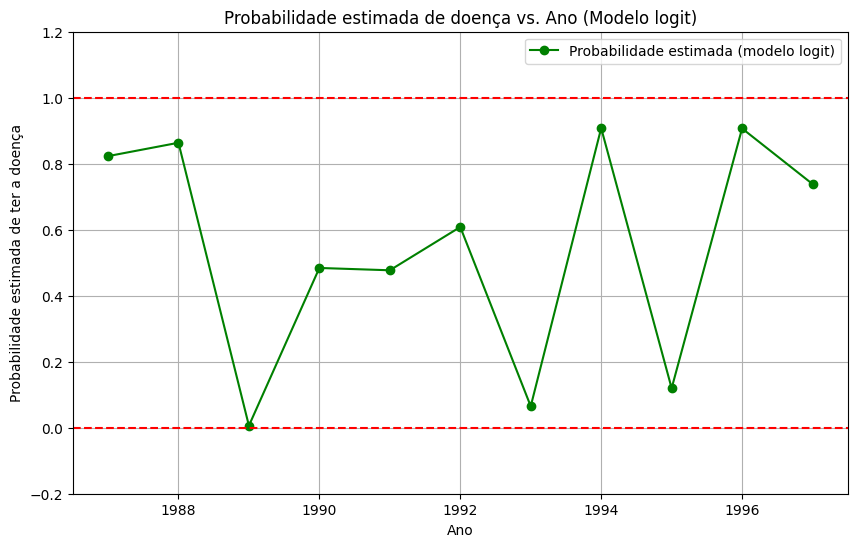

In [14]:
# Figura (anos em função das probabilidades)

plt.figure(figsize=(10,6))
plt.plot(dados_doenca['ano'],prob_logit_predict,'o-',linestyle='-',color='green',label='Probabilidade estimada (modelo logit)')
plt.xlabel('Ano')
plt.ylabel('Probabilidade estimada de ter a doença')
plt.ylim(-0.2,1.2)
plt.axhline(0,color='red',linestyle='--')
plt.axhline(1,color='red',linestyle='--')
plt.legend()
plt.title('Probabilidade estimada de doença vs. Ano (Modelo logit)')
plt.grid(True)
plt.show()


In [16]:
# Classificação (Modelo Logit)

logit_classe=np.where(prob_logit_predict>0.5,1,0)
print('\nClassificação (Modelo logit, limiar 0.5): ')
print(logit_classe)


Classificação (Modelo logit, limiar 0.5): 
[1 1 0 0 0 1 0 1 0 1 1]


In [18]:
# Acessando medidas de qualidade (Modelo Logit)

#Tabela de confusão

tabela_logit=confusion_matrix(dados_doenca['doenca'],logit_classe)
print('\nTabela de confusão (Modelo logit)')
print(tabela_logit)


Tabela de confusão (Modelo logit)
[[4 1]
 [1 5]]


In [19]:
#Acurácia

AC_logit=np.trace(tabela_logit)/np.sum(tabela_logit)
print(f'\nAcurácia (Modelo logit):{AC_logit:.4f}')


Acurácia (Modelo logit):0.8182


In [20]:
# Taxa de erro aparente

TEA_logit=1-AC_logit
print(f'\nTaxa de erro aparente (Modelo logit):{TEA_logit:.4f}')


Taxa de erro aparente (Modelo logit):0.1818


In [21]:
# Sensiilidade (Verdadeiros Positivos)

S_logit=tabela_logit[1,1]/np.sum(tabela_logit[1,:])
print(f'\nSensibilidade (Modelo logit):{S_logit:.4f}')


Sensibilidade (Modelo logit):0.8333


In [22]:
# Especificidade (verdadeiros negativos)

E_logit=tabela_logit[0,0]/np.sum(tabela_logit[0,:])
print(f'\nEspecificidade (Modelo logit):{E_logit:.4f}')


Especificidade (Modelo logit):0.8000
